In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

In [4]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

In [5]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


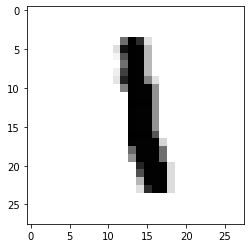

In [17]:
plt.imshow(x_train[6], cmap=plt.cm.binary)
plt.show(6)


In [7]:
#Reshaping data

x_train_with_chanels = x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [8]:
# Normalizing the data

x_train_normalized = x_train_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [9]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

In [10]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [11]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)


Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1976 - accuracy: 0.9402 - val_loss: 0.0647 - val_accuracy: 0.9796
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0646 - accuracy: 0.9802 - val_loss: 0.0493 - val_accuracy: 0.9837
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0485 - accuracy: 0.9851 - val_loss: 0.0314 - val_accuracy: 0.9898
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0392 - accuracy: 0.9877 - val_loss: 0.0294 - val_accuracy: 0.9911
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0324 - accuracy: 0.9898 - val_loss: 0.0287 - val_accuracy: 0.9912
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0293 - accuracy: 0.9905 - val_loss: 0.0275 - val_accuracy: 0.9904
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0253 - accuracy: 0.9916 - val_loss: 0.0255 - val_ac

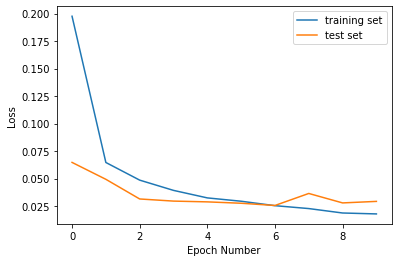

In [12]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

In [13]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

In [14]:
loaded_model = tf.keras.models.load_model(model_name)

In [15]:
predictions_one_hot = loaded_model.predict([x_test_normalized])
prediction = np.argmax(predictions_one_hot,axis = 1)
print(prediction[0])

313/313 [==============================] - 2s 5ms/step
7


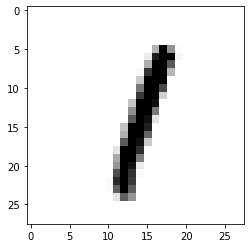

1


In [21]:
plt.imshow(x_test_normalized[5].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()
print(prediction[5])